## Prediccion del Precio de una Casa

In [18]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
_file = '//Users/hfarias/Doctorado/1-2017/NN/Parte3/house/housing.csv'

In [10]:
df = pd.read_csv(_file, delim_whitespace=True ,header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [11]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


Muestre en un grafico el error cuadratico (MSE) vs numero de epochs de entrenamiento, para una red feedforward de 3 capas, con 200 unidades ocultas y funcion de activacion sigmoidal. Entrene la red usando gradiente descendente estocastico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de test. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repeticion del experimento.

In [36]:
def normalizar(_dataset,_centrando,_escalado):
    df_train, df_test= train_test_split(_dataset, test_size=0.25, random_state=0)
        
    scaler = preprocessing.StandardScaler(with_mean=_centrando, with_std=_centrando)
    scaler = scaler.fit(df_train)
    
    XtrN = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)    
    XteN = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)  
    
    print "Dimenciones dataset = "+str(_dataset.shape)
    print "Tamaño dataset de entrenamiento  = "+str(len(XtrN.index))
    print "Tamaño dataset de testing  = "+str(len(XteN.index))
    return XtrN,XteN                                              

In [37]:
_centrando = True
_escalado  = True

In [38]:
XtrN,XteN = normalizar(df,_centrando,_escalado)
YtrN = XtrN.pop('MEDV')
YteN = XteN.pop('MEDV')

Dimenciones dataset = (506, 14)
Tamaño dataset de entrenamiento  = 379
Tamaño dataset de testing  = 127


In [39]:
_numeroCapas           = 3
_numeroNeuronasOcultas = 200
_learningRate          = 0.01
_epochs                = 300

In [46]:
model = Sequential()

### Capa de entrada con 200 neuronas ocultas

In [47]:
model.add(Dense(200, input_dim=XtrN.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))

### Capa escondida con funcion de activacion sigmoidal

In [49]:
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))

### Capa salida

In [50]:
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

### Evaluar modelo

In [51]:
hist = model.fit(XtrN.as_matrix(), YtrN.as_matrix(), epochs=_epochs,
                 verbose=0, validation_data=(XteN.as_matrix(), YteN.as_matrix()))

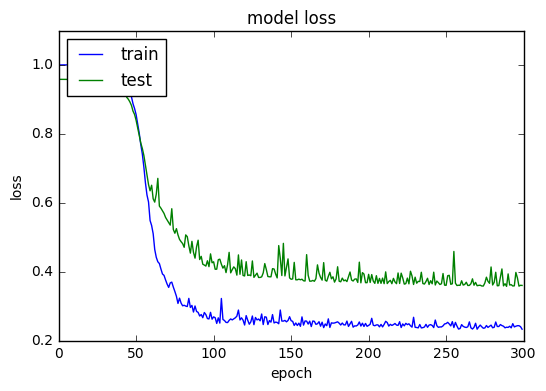

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()